# 얕은 신경망을 이용한 다중 분류 문제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 함수 구현

### Sigmoid 함수
$sigmoid(x) = 1/(1+e^{-x})$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Softmax 함수
$softmax(x)_i = e^{x_i}/\sum{e^{x_j}}$

In [15]:
def softmax(x):
    e_x = np.exp(x)
    return e_x /np.sum(e_x)

## 네트워크 구조 정의

In [16]:
# Define network architecture
class ShallowNN:
    def __init__(self,num_input,num_hidden, num_output):
        # hidden
        self.W_h = np.zeros((num_hidden, num_input), dtype = np.float32) # n by n 행렬
        self.b_h = np.zeros((num_hidden), dtype = np.float32)

        # output
        self.W_o = np.zeros((num_output, num_hidden), dtype = np.float32) # n by n 행렬
        self.b_o = np.zeros((num_output), dtype = np.float32)        
    def __call__(self,x):
         h = sigmoid(np.matmul(self.W_h,x) + self.b_h)
         return softmax(np.matmul(self.W_o,h) + self.b_o)


## 데이터셋 가져오기, 정리하기

In [17]:
# Import and organize dataset
dataset = np.load('dataset/ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

## 모델 만들기

In [18]:
# Create Model
# 길이가 10인 원핫벡터
model  = ShallowNN(2,128,10)

## 사전에 학습된 파라미터 불러오기

In [19]:
weights = np.load('dataset/ch2_parameters.npz')
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

## 모델 구동 및 결과 프린트

In [28]:
outputs = list()

# 왼쪽값이 추정값, 오른쪽이 실제값
for pt, label in zip(inputs, labels):
   output = model(pt) 
   outputs.append(np.argmax(output)) #소프트 맥스이기때문에 값이 가장 큰 값을 넣기 위해 np.argmax를 사용
#    print(np.argmax(output), label)
outputs = np.stack(outputs, axis=0)

## 정답 클래스 스캐터 플랏

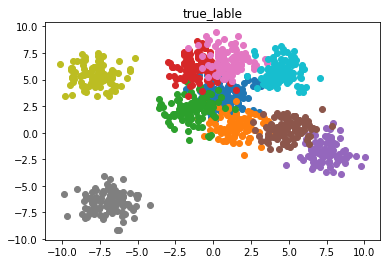

In [29]:
plt.figure()

for idx in range(10):
    mask = labels == idx
    plt.scatter(inputs[mask,0], inputs[mask,1])
plt.title('true_lable')
plt.show()

## 모델 출력 클래스 스캐터 플랏

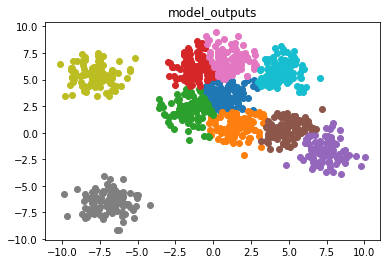

In [31]:
plt.figure()

for idx in range(10):
    mask = outputs == idx
    plt.scatter(inputs[mask,0], inputs[mask,1])
plt.title('model_outputs')
plt.show()